KNN Accuracy: 0.9555555555555556


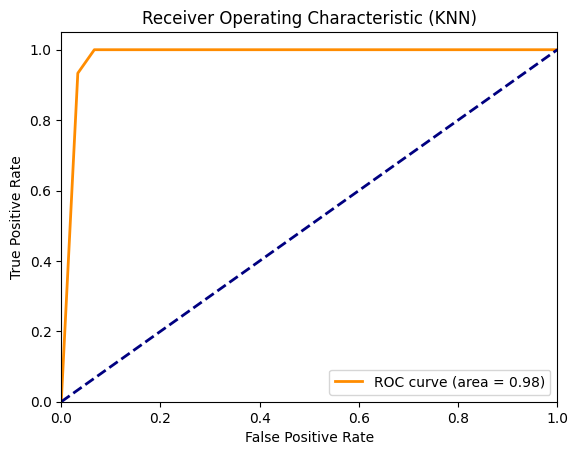

c:\IT\ML\MLvm\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9333333333333333
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


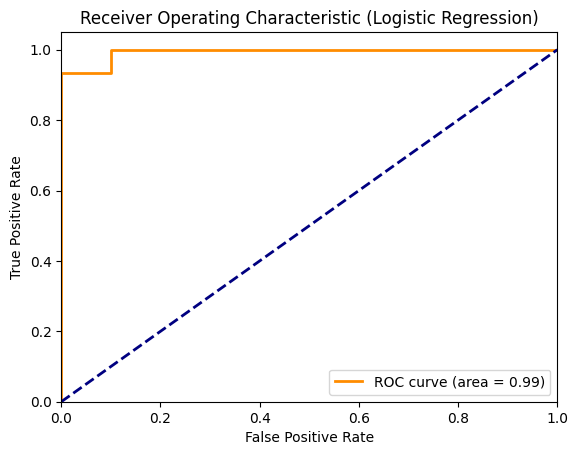

c:\IT\ML\MLvm\lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\metrics\_ranking.py", line 634, in roc_auc_score
    raise ValueError("multi_class must

Best parameters for KNN: {'n_neighbors': 3}
Best AUC for KNN: nan


c:\IT\ML\MLvm\lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "c:\IT\ML\MLvm\lib\site-packages\sklearn\metrics\_ranking.py", line 634, in roc_auc_score
    raise ValueError("multi_class must

Best parameters for Logistic Regression: {'C': 0.1, 'max_iter': 200}
Best AUC for Logistic Regression: nan


['best_lr_model_v01.pkl']

In [1]:

import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn}')

# Plot AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (KNN)')
plt.legend(loc="lower right")
plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Create and train Logistic Regression model
lr = LogisticRegression(max_iter=200, multi_class="multinomial")
lr.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(f'Confusion Matrix:\n {conf_matrix}')

# Plot AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


from sklearn.model_selection import GridSearchCV, cross_val_score

# KNN hyperparameter tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
grid_knn.fit(X, y)
print(f'Best parameters for KNN: {grid_knn.best_params_}')
print(f'Best AUC for KNN: {grid_knn.best_score_}')

# Logistic Regression hyperparameter tuning
param_grid_lr = {'C': [0.1, 1, 10, 100], 'max_iter': [200, 300, 400]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X, y)
print(f'Best parameters for Logistic Regression: {grid_lr.best_params_}')
print(f'Best AUC for Logistic Regression: {grid_lr.best_score_}')

# Save the best models
import joblib

best_knn_model = grid_knn.best_estimator_
best_lr_model = grid_lr.best_estimator_

# Save model and type names
model_with_metadata = {
    'model': best_knn_model,
    'target_names': iris.target_names
}

joblib.dump(model_with_metadata, 'best_knn_model_v01.pkl')

# Save model and type names
model_with_metadata = {
    'model': best_lr_model,
    'target_names': iris.target_names
}

joblib.dump(best_lr_model, 'best_lr_model_v01.pkl')

